# Supervised learning

## Multiple linear regression 

### Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### Load Data Set 

In [2]:
os.chdir('C:\\Users\\ankit\\OneDrive\\Documents\\Desktop\\data science\\Top Mentor Lecture\\Batch 52 - Day 11_13_6_21')
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

### Split in X and Y

In [6]:
x = df.iloc[:,:-1]
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,California


In [7]:
y = df.iloc[:,4:]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Lable Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
x.iloc[:,3]=label.fit_transform(x.iloc[:,3])
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,0


### One Hot  Encoding 

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)   

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [0.0000000e+00 1.000

### Print X as Data Frame 

In [10]:
pd.DataFrame(x)

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,0.0,142107.34,91391.77,366168.42
5,0.0,0.0,1.0,131876.90,99814.71,362861.36
6,1.0,0.0,0.0,134615.46,147198.87,127716.82
7,0.0,0.0,1.0,130298.13,145530.06,323876.68
8,0.0,0.0,1.0,120542.52,148718.95,311613.29
9,1.0,0.0,0.0,123334.88,108679.17,304981.62


### Split the data as train , test split

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

type(y_test)

pandas.core.frame.DataFrame

### Create the Model 

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### Predictions 

In [13]:
y_pred = reg.predict(x_test)
y_pred = pd.DataFrame(y_pred)
print(y_pred)
type(y_pred)

               0
0  125685.700205
1   84338.923171
2   99390.936588
3   46818.589139
4  128971.455888
5   52062.298821
6  109174.113825
7   99985.259617
8   97162.650755
9  115228.183877


pandas.core.frame.DataFrame

### Print Result

In [14]:
y_test= pd.DataFrame(y_test)
result = pd.concat([y_pred,y_test],axis=1)
print(result)

                0     Profit
0   125685.700205        NaN
1    84338.923171        NaN
2    99390.936588        NaN
3    46818.589139        NaN
4   128971.455888        NaN
5    52062.298821        NaN
6   109174.113825        NaN
7    99985.259617        NaN
8    97162.650755        NaN
9   115228.183877        NaN
13            NaN  134307.35
17            NaN  125370.37
19            NaN  122776.86
25            NaN  107404.34
26            NaN  105733.54
30            NaN   99937.59
32            NaN   97427.84
39            NaN   81005.76
45            NaN   64926.08
48            NaN   35673.41


### Print Y and Prediction in one data frame - Concat

In [15]:
y_pre = pd.DataFrame(y_pred,columns=['Prediction'])
y_te = pd.DataFrame(y_test,columns=['Actual'])
x_te = pd.DataFrame(x_test,columns=['California','Florida','New York','R&D','Administration','Marketing '])
result = pd.concat([x_te,y_te,y_pre],axis=1)
result

,California,Florida,New York,R&D,Administration,Marketing,Actual,Prediction
0,1.0,0.0,0.0,91992.39,135495.07,252664.93,NaN,NaN
1,1.0,0.0,0.0,38558.51,82982.09,174999.30,NaN,NaN
2,0.0,0.0,1.0,61994.48,115641.28,91131.24,NaN,NaN
3,0.0,0.0,1.0,1000.23,124153.04,1903.93,NaN,NaN
4,0.0,0.0,1.0,94657.16,145077.58,282574.31,NaN,NaN
5,0.0,0.0,1.0,542.05,51743.15,0.00,NaN,NaN
6,0.0,0.0,1.0,75328.87,144135.98,134050.07,NaN,NaN
7,1.0,0.0,0.0,64664.71,139553.16,137962.62,NaN,NaN
8,1.0,0.0,0.0,63408.86,129219.61,46085.25,NaN,NaN
9,0.0,1.0,0.0,86419.70,153514.11,0.00,NaN,NaN


### Accuracy 

In [16]:
r2_score(y_test,y_pred)

0.8988481687284339

### Regression Coefficient 

In [17]:
reg.coef_

array([[-1.22767929e+03,  1.42750258e+03, -1.99823287e+02,
         8.09359318e-01, -7.82867439e-02,  2.84635373e-02]])

### Regression Intercept

In [18]:
reg.intercept_

array([55874.21162477])

### Ordinary Least Square Method 

In [19]:
x=x.astype('float64')
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y, exog = x)
reg_ols = reg_ols.fit()
print (reg_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           1.14e-27
Time:                        12:31:37   Log-Likelihood:                -525.19
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.062e+04   6806.869      7.436      0.0

### Tune the Model by removing State Column (P Value Greater than 0.05)
### Print the Data Frame


In [20]:
pd.DataFrame(x)

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,0.0,142107.34,91391.77,366168.42
5,0.0,0.0,1.0,131876.90,99814.71,362861.36
6,1.0,0.0,0.0,134615.46,147198.87,127716.82
7,0.0,0.0,1.0,130298.13,145530.06,323876.68
8,0.0,0.0,1.0,120542.52,148718.95,311613.29
9,1.0,0.0,0.0,123334.88,108679.17,304981.62


### Create the OLS Method by removing the variable which has maximum P Value – Remove Column 4 

In [22]:
x_opt=x[:,[0,1,2,3,5]]
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y, exog =x_opt)
reg_ols = reg_ols.fit()
print (reg_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           8.77e-29
Time:                        12:36:06   Log-Likelihood:                -525.42
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.681e+04   3130.528     14.954      0.0

### Create the OLS Method by removing the variable which has maximum P Value – Remove Column last Column 

In [23]:
x_opt=x[:,[0,1,2,3]]
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y, exog =x_opt)
reg_ols = reg_ols.fit()
print (reg_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.7
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           2.70e-29
Time:                        12:36:58   Log-Likelihood:                -527.33
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           4.88e+04   3029.803     16.108      0.0

### All the variables with P Value < 0.05 removed , create the model again with new data set 

### Train test Split 

In [26]:
from sklearn.model_selection import train_test_split
xopt_train,xopt_test,y_train,y_test =train_test_split (x_opt,y,test_size = 0.2,random_state= 42)

### Create Model  

In [27]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(xopt_train,y_train)


LinearRegression()

### Prediction 

In [28]:
yopt_pred= reg.predict(xopt_test)
print (yopt_pred)

[[127104.50547983]
 [ 81512.65619485]
 [102423.00038456]
 [ 50380.35153986]
 [130292.05993636]
 [ 49989.41467535]
 [113800.41672017]
 [103787.4738911 ]
 [102715.93418774]
 [124429.72812972]]


### Print Result

In [29]:
result = pd.concat([pd.DataFrame(yopt_pred),pd.DataFrame(y_test)], axis =1)
print (result)

                0     Profit
0   127104.505480        NaN
1    81512.656195        NaN
2   102423.000385        NaN
3    50380.351540        NaN
4   130292.059936        NaN
5    49989.414675        NaN
6   113800.416720        NaN
7   103787.473891        NaN
8   102715.934188        NaN
9   124429.728130        NaN
13            NaN  134307.35
17            NaN  125370.37
19            NaN  122776.86
25            NaN  107404.34
26            NaN  105733.54
30            NaN   99937.59
32            NaN   97427.84
39            NaN   81005.76
45            NaN   64926.08
48            NaN   35673.41


### Print Original Data Frame with Predicted Value 

In [30]:
yopt_pre= pd.DataFrame(yopt_pred, columns =['Prediction'])
y_te = pd.DataFrame(y_test,columns= ['Actual'])
x_te = pd.DataFrame(x_test,columns= ['CF','FR','New Y','R&D','Admin','Mark'])
result = pd.concat([x_te,y_te,yopt_pre], axis =1)
print (result)

     CF   FR  New Y       R&D      Admin       Mark  Actual     Prediction
0   1.0  0.0    0.0  91992.39  135495.07  252664.93     NaN  127104.505480
1   1.0  0.0    0.0  38558.51   82982.09  174999.30     NaN   81512.656195
2   0.0  0.0    1.0  61994.48  115641.28   91131.24     NaN  102423.000385
3   0.0  0.0    1.0   1000.23  124153.04    1903.93     NaN   50380.351540
4   0.0  0.0    1.0  94657.16  145077.58  282574.31     NaN  130292.059936
5   0.0  0.0    1.0    542.05   51743.15       0.00     NaN   49989.414675
6   0.0  0.0    1.0  75328.87  144135.98  134050.07     NaN  113800.416720
7   1.0  0.0    0.0  64664.71  139553.16  137962.62     NaN  103787.473891
8   1.0  0.0    0.0  63408.86  129219.61   46085.25     NaN  102715.934188
9   0.0  1.0    0.0  86419.70  153514.11       0.00     NaN  124429.728130
13  NaN  NaN    NaN       NaN        NaN        NaN     NaN            NaN
17  NaN  NaN    NaN       NaN        NaN        NaN     NaN            NaN
19  NaN  NaN    NaN      

### Check Accuracy 

In [31]:
r2_score(y_test, yopt_pred)

0.9249293035519259

### Prediction for All 50 records 

In [32]:
yfull_pred= reg.predict(x_opt)
print (yfull_pred)

[[190609.23760206]
 [187347.68176123]
 [181615.32386648]
 [172711.03054386]
 [169864.51555816]
 [162049.37901006]
 [163472.15431055]
 [160702.31149605]
 [152378.44841886]
 [153847.12795635]
 [135569.2211861 ]
 [136590.30658463]
 [128701.22207757]
 [127104.50547983]
 [153033.30666789]
 [147242.88204075]
 [115176.84409958]
 [130292.05993636]
 [127810.84207008]
 [124429.72812972]
 [113675.78408196]
 [116411.83879773]
 [111748.0620994 ]
 [106234.40863019]
 [115263.84038289]
 [103787.4738911 ]
 [113800.41672017]
 [111051.90479579]
 [107050.81061953]
 [105504.04499087]
 [102423.00038456]
 [101690.83633674]
 [102715.93418774]
 [ 96876.49722903]
 [ 90305.61901919]
 [ 88787.85497074]
 [ 73983.94331441]
 [ 86215.22957756]
 [ 66787.58386075]
 [ 81512.65619485]
 [ 75227.40821579]
 [ 72412.36305096]
 [ 68784.40103059]
 [ 62757.00413935]
 [ 67535.95083466]
 [ 50380.35153986]
 [ 51815.50502647]
 [ 48613.04687258]
 [ 49989.41467535]
 [ 48613.04687258]]


### Accuracy 

In [33]:
r2_score(y, yfull_pred)

0.9466076733431739

### Create the Model with only column R& D Spend 

In [34]:
x_opt=x[:,3:4]
x_opt

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

### Train Test Split 

In [35]:
from sklearn.model_selection import train_test_split
xopt_train,xopt_test,y_train,y_test =train_test_split (x_opt,y,test_size = 0.2,random_state= 42)

###    Print Shape

In [36]:
print (xopt_train.shape)

(40, 1)


### Create Model with one column 

In [37]:
from sklearn.linear_model import LinearRegression
freg= LinearRegression()
freg.fit(xopt_train,y_train)

LinearRegression()

### Prediction and Check accuracy 

In [39]:
yone_pred= freg.predict(x_opt)
r2_score(y, yone_pred)

0.9464943582068932

### Print the result as Graph 

<AxesSubplot:ylabel='Profit'>

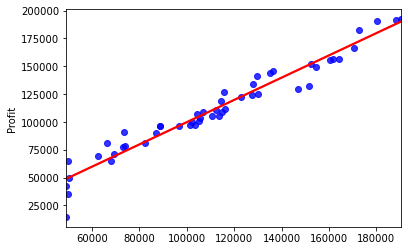

In [40]:
import seaborn as sns
sns.regplot( x = yone_pred, y = y, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)


### Prediction for New Data Set 

### Load new Data Set 


In [41]:
df_Predict=pd.read_csv('50_Startups_Predictions.csv')
df_Predict

,R&D Spend,Administration,Marketing Spend,State
0,120542.52,148718.95,311613.29,New York
1,123334.88,108679.17,304981.62,California
2,101913.08,110594.11,229160.95,California
3,100671.96,91790.61,249744.55,Florida
4,93863.75,127320.38,249839.44,California
5,91992.39,135495.07,252664.93,California
6,119943.24,156547.42,256512.92,Florida
7,114523.61,122616.84,261776.23,New York
8,78013.11,121597.55,264346.06,California
9,72107.60,127864.55,353183.81,New York


### Count Number of Records 

In [42]:
df_Predict.count()

R&D Spend          28
Administration     28
Marketing Spend    28
State              28
dtype: int64

### Create Array 

In [43]:
x_Predict = df_Predict.values
print (x_Predict)

[[120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'California']
 [100671.96 91790.61 249744.55 'Florida']
 [93863.75 127320.38 249839.44 'California']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [72107.6 127864.55 353183.81 'New York']
 [66051.52 182645.56 118148.2 'Florida']
 [65605.48 153032.06 107138.38 'New York']
 [61994.48 115641.28 91131.24 'New York']
 [61136.38 152701.92 88218.23 'New York']
 [63408.86 129219.61 46085.25 'California']
 [55493.95 103057.49 214634.81 'New York']
 [46426.07 157693.92 210797.67 'Florida']
 [46014.02 85047.44 205517.64 'New York']
 [28663.76 127056.21 201126.82 'New York']
 [44069.95 51283.14 197029.42 'California']
 [20229.59 65947.93 185265.1 'New York']
 [38558.51 82982.09 174999.3 'California']
 [22177.74 154806.14 28334.72 'California']
 [10

### Label Encoding 

In [44]:
Label_Predict = LabelEncoder()
x_Predict[:,3]= Label_Predict.fit_transform(x_Predict[:,3])
print (x_Predict)

[[120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 0]
 [100671.96 91790.61 249744.55 1]
 [93863.75 127320.38 249839.44 0]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 118148.2 1]
 [65605.48 153032.06 107138.38 2]
 [61994.48 115641.28 91131.24 2]
 [61136.38 152701.92 88218.23 2]
 [63408.86 129219.61 46085.25 0]
 [55493.95 103057.49 214634.81 2]
 [46426.07 157693.92 210797.67 1]
 [46014.02 85047.44 205517.64 2]
 [28663.76 127056.21 201126.82 2]
 [44069.95 51283.14 197029.42 0]
 [20229.59 65947.93 185265.1 2]
 [38558.51 82982.09 174999.3 0]
 [22177.74 154806.14 28334.72 0]
 [1000.23 124153.04 1903.93 2]
 [1315.46 115816.21 297114.46 1]
 [0.0 135426.92 0.0 0]
 [542.05 51743.15 0.0 2]
 [0.0 116983.8 45173.06 0]]


### One Hot Encoding `

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x_Predict = np.array(ct.fit_transform(x_Predict))
print (x_Predict)


[[0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 72107.6 127864.55 353183.81]
 [0.0 1.0 0.0 66051.52 182645.56 118148.2]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 61994.48 115641.28 91131.24]
 [0.0 0.0 1.0 61136.38 152701.92 88218.23]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [0.0 0.0 1.0 55493.95 103057.49 214634.81]
 [0.0 1.0 0.0 46426.07 157693.92 210797.67]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 0.0 1.0 28663.76 127056.21 201126.82]
 [1.0 0.0 0.0 44069.95 51283.14 197029.42]
 [0.0 0.0 1.0 20229.59 65947.93 185265.1]
 [1.0 0.0 0.0 38558.51 82982.09 174999.3]
 [1.0 0.0 0.0 22177.74 154806.14 28334

### Print X Values 

In [47]:
print (pd.DataFrame(x_Predict))

    0  1  2        3        4        5
0   0  0  1   120543   148719   311613
1   1  0  0   123335   108679   304982
2   1  0  0   101913   110594   229161
3   0  1  0   100672  91790.6   249745
4   1  0  0  93863.8   127320   249839
5   1  0  0  91992.4   135495   252665
6   0  1  0   119943   156547   256513
7   0  0  1   114524   122617   261776
8   1  0  0  78013.1   121598   264346
9   0  0  1  72107.6   127865   353184
10  0  1  0  66051.5   182646   118148
11  0  0  1  65605.5   153032   107138
12  0  0  1  61994.5   115641  91131.2
13  0  0  1  61136.4   152702  88218.2
14  1  0  0  63408.9   129220  46085.2
15  0  0  1  55493.9   103057   214635
16  0  1  0  46426.1   157694   210798
17  0  0  1    46014  85047.4   205518
18  0  0  1  28663.8   127056   201127
19  1  0  0  44069.9  51283.1   197029
20  0  0  1  20229.6  65947.9   185265
21  1  0  0  38558.5  82982.1   174999
22  1  0  0  22177.7   154806  28334.7
23  0  0  1  1000.23   124153  1903.93
24  0  1  0  1315.46   11

### Generate Predicted Values 

In [48]:
xone_Predict= x_Predict[:,3:4]
yone_Predict= freg.predict(xone_Predict)
print (yone_Predict)


[[152232.86095279]
 [154616.44488025]
 [136330.60130088]
 [135271.16996536]
 [129459.61990349]
 [127862.20996405]
 [151721.31008683]
 [147095.06455947]
 [115929.36923955]
 [110888.37211903]
 [105718.84707519]
 [105338.10326888]
 [102255.72078164]
 [101523.23880648]
 [103463.04843113]
 [ 96706.80916997]
 [ 88966.38421611]
 [ 88614.65458336]
 [ 73804.31462961]
 [ 86955.17872572]
 [ 66604.83030328]
 [ 82250.56334619]
 [ 68267.78888609]
 [ 50190.4734756 ]
 [ 50459.55667456]
 [ 49336.66803799]
 [ 49799.36685472]
 [ 49336.66803799]]


### Display the result as Data Frame – with X 

In [49]:
yone_Predict= pd.DataFrame(yone_Predict, columns =['Prediction'])
x_Predict = pd.DataFrame(x_Predict,columns= ['CF','FR','New Y','R&D','Admin','Mark'])
result = pd.concat([x_Predict,yone_Predict], axis =1)
print (result)

   CF FR New Y      R&D    Admin     Mark     Prediction
0   0  0     1   120543   148719   311613  152232.860953
1   1  0     0   123335   108679   304982  154616.444880
2   1  0     0   101913   110594   229161  136330.601301
3   0  1     0   100672  91790.6   249745  135271.169965
4   1  0     0  93863.8   127320   249839  129459.619903
5   1  0     0  91992.4   135495   252665  127862.209964
6   0  1     0   119943   156547   256513  151721.310087
7   0  0     1   114524   122617   261776  147095.064559
8   1  0     0  78013.1   121598   264346  115929.369240
9   0  0     1  72107.6   127865   353184  110888.372119
10  0  1     0  66051.5   182646   118148  105718.847075
11  0  0     1  65605.5   153032   107138  105338.103269
12  0  0     1  61994.5   115641  91131.2  102255.720782
13  0  0     1  61136.4   152702  88218.2  101523.238806
14  1  0     0  63408.9   129220  46085.2  103463.048431
15  0  0     1  55493.9   103057   214635   96706.809170
16  0  1     0  46426.1   15769

### Display the result with Actual Input Data Set 

In [50]:
yone_Predict= pd.DataFrame(yone_Predict, columns =['Prediction'])
result = pd.concat([df_Predict,yone_Predict], axis =1)
print (result)

    R&D Spend  Administration  Marketing Spend       State     Prediction
0   120542.52       148718.95        311613.29    New York  152232.860953
1   123334.88       108679.17        304981.62  California  154616.444880
2   101913.08       110594.11        229160.95  California  136330.601301
3   100671.96        91790.61        249744.55     Florida  135271.169965
4    93863.75       127320.38        249839.44  California  129459.619903
5    91992.39       135495.07        252664.93  California  127862.209964
6   119943.24       156547.42        256512.92     Florida  151721.310087
7   114523.61       122616.84        261776.23    New York  147095.064559
8    78013.11       121597.55        264346.06  California  115929.369240
9    72107.60       127864.55        353183.81    New York  110888.372119
10   66051.52       182645.56        118148.20     Florida  105718.847075
11   65605.48       153032.06        107138.38    New York  105338.103269
12   61994.48       115641.28         